In [6]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.spatial.distance import correlation

In [7]:
# Load the pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [8]:
# Function to load the image and preprocess it
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data

In [9]:
# Function to Extract embeddings
def get_embedding(model, img_path):
    img_data = preprocess_image(img_path)
    embedding = model.predict(img_data)
    return embedding.flatten()

In [10]:
#Load the images, extract embeddings and store them in a list along with labels.
image_dir = 'D:\\Programming\\Project\\dataset_3'  # Directory containing actor images
embeddings = []
labels = []
image_paths = []

for actor in os.listdir(image_dir):
    actor_dir = os.path.join(image_dir, actor)
    if os.path.isdir(actor_dir):
        for img_file in os.listdir(actor_dir):
            img_path = os.path.join(actor_dir, img_file)
            if img_path.endswith(('jpg', 'jpeg', 'png')):  # Check for valid image files
                embedding = get_embedding(model, img_path)
                embeddings.append(embedding)
                labels.append(actor)
                image_paths.append(img_path)

# Convert into arrays
embeddings = np.array(embeddings)
labels = np.array(labels)
image_paths = np.array(image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [11]:
# Fit KNN
knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(embeddings)

# Use KNN to find the most similar embeddings
def find_similar_images(img_path, model, knn, labels, image_paths):
    embedding = get_embedding(model, img_path)
    distances, indices = knn.kneighbors([embedding])
    inverse_distances = 1 / distances[0]
    print(distances)
    print(distances[0])
    print(distances[0][0])
    print(inverse_distances)
    print(indices)
    probabilities = inverse_distances / np.sum(inverse_distances)
    sorted_indices = np.argsort(-probabilities)
    print(sorted_indices)
    sorted_probabilities = probabilities[sorted_indices]
    sorted_similar_images = labels[indices[0][sorted_indices]]
    sorted_similar_image_paths = image_paths[indices[0][sorted_indices]]
    return sorted_similar_images, sorted_similar_image_paths, sorted_probabilities
    # print(indices[0])

In [12]:
# Function to display the input image and similar images
def display_similar_images(input_image,similar_images, similar_image_paths, probabilities):
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    input_img = image.load_img(input_image, target_size=(224,224))
    input_img = image.img_to_array(input_img) / 255.0
    axes[0].imshow(input_img)
    axes[0].set_title(f"Input Image")
    axes[0].axis('off')
    for i in range(5):
        img = image.load_img(similar_image_paths[i], target_size=(224, 224))
        img = image.img_to_array(img) / 255.0  # Normalize the image to [0, 1] range
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"{similar_images[i]}\nProbability: {probabilities[i]:.2f}")
        axes[i+1].axis('off')
    plt.show()

In [13]:
# Load the image and find the top five similar actors/actresses
import matplotlib.image as mpimg

input_image = 'D:\\Programming\\Project\\istockphoto-1364917563-612x612.jpg'
print(type(input_image))
similar_images, similar_image_paths, probabilities = find_similar_images(input_image, model, knn, labels, image_paths)


<class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[184.29118347 187.4385376  188.30657959 190.05537415 190.87193298]]
[184.29118347 187.4385376  188.30657959 190.05537415 190.87193298]
184.2911834716797
[0.0054262  0.00533508 0.00531049 0.00526162 0.00523911]
[[508 208 628  33 525]]
[0 1 2 3 4]


In [14]:
# Print the list of similar actors
print("Top 5 similar actors/actresses:")
for i in range(5):
    print(f"{similar_images[i]} with probability {probabilities[i]:.2f}")

Top 5 similar actors/actresses:
anil_kapoor with probability 0.20
akshay_kumar with probability 0.20
anupam_kher with probability 0.20
abhay_deol with probability 0.20
anil_kapoor with probability 0.20


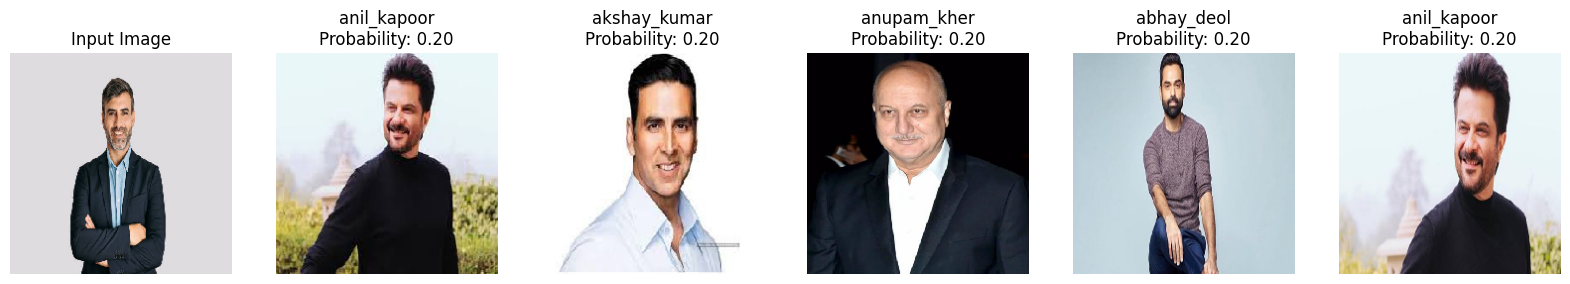

In [15]:
# Display the input image, similar actors along with probabilities
display_similar_images(input_image,similar_images, similar_image_paths, probabilities)